<a href="https://colab.research.google.com/github/sallyeric/2019FALL_PS/blob/master/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 초보자를 위한 빠른 시작

In [ ]:
!pip install -q tensorflow-gpu==2.0.0-rc1
import tensorflow as tf

     |████████████████████████████████| 380.5MB 43kB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 501kB 49.6MB/s 
     |████████████████████████████████| 4.3MB 47.5MB/s 


In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test, verbose=2)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 98us/sample - loss: 0.2948 - accuracy: 0.9147
Epoch 2/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.1413 - accuracy: 0.9582
Epoch 3/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.1078 - accuracy: 0.9674
Epoch 4/5
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0873 - accuracy: 0.9731
Epoch 5/5
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0748 - accuracy: 0.9763
10000/1 - 1s - loss: 0.0404 - accuracy: 0.9767


[0.07494844044172205, 0.9767]



# 1. Keras를 사용한 ML 기본사항

# 기본 이미지 분류

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-rc1


In [ ]:
# 데이터 import
fashion_mnist = keras.datasets.fashion_mnist

# load_data() 함수를 호출하면 네 개의 넘파이(NumPy) 배열이 반환된다.
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# train_images와 train_labels 배열은 모델 학습에 사용되는 훈련 세트
# test_images와 test_labels 배열은 모델 테스트에 사용되는 테스트 세트

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
# train: 60000개 image, 28*28 pixels
train_images.shape 

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
# test: 10000개 image, 28*28 pixels
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

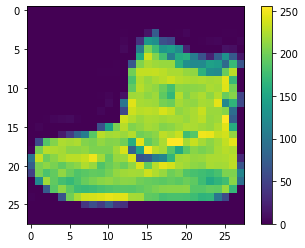

In [ ]:
# 데이터 전처리
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

# 훈련 세트에 있는 첫 번째 이미지를 보면 픽셀 값의 범위가 0~255 사이라는 것을 알 수 있다.

In [ ]:
# 신경망 모델에 주입하기 전에 이 값의 범위를 0~1 사이로 조정
train_images = train_images / 255.0
test_images = test_images / 255.0

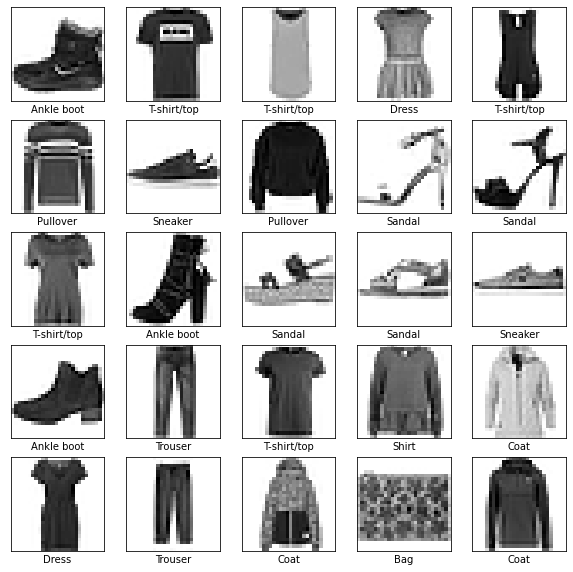

In [ ]:
# 훈련 세트에서 처음 25개 이미지와 그 아래 클래스 이름을 출력
# 데이터 포맷이 올바른지 확인하고 네트워크 구성과 훈련할 준비를 마친다.

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1) # 5*5 판 생성
  plt.xticks([]) # x축 제거
  plt.yticks([]) # y축 제거
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary) # 이미지 표시
  plt.xlabel(class_names[train_labels[i]])        # label 표시
plt.show()

In [ ]:
# 모델 구성
# 신경망 모델을 만들려면 모델의 층을 구성한 다음 모델을 컴파일합니다.

In [ ]:
# 층 설정
# 대부분 딥러닝은 간단한 층을 연결하여 구성됩니다. 
# tf.keras.layers.Dense와 같은 층들의 가중치(parameter)는 훈련하는 동안 학습됩니다.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),   # 2차원 to 1차원 변환
    keras.layers.Dense(128, activation='relu'),  # 128개의 노드(뉴런)
    keras.layers.Dense(10, activation='softmax') # 10개의 노드, 10개의 확률을 반환하고 전체 합은 1
                                                 # 각 노드는 현재 이미지가 10개 클래스 중 하나에 속할 확률을 출력
])

In [ ]:
# 모델 컴파일
# Loss Function  : 훈련 하는 동안 모델의 오차를 측정, 함수 최소화 필요
# Optimizer      : 데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정
# Metrics (지표) : 훈련 단계와 테스트 단계를 모니터링하기 위해 사용
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) # 올바르게 분류된 이미지의 비율인 정확도를 사용

In [ ]:
# 모델 훈련
# 훈련 데이터를 모델에 주입 (train_images, train_labels)
# 모델이 이미지와 레이블을 매핑하는 방법을 배운다
# 테스트 세트에 대한 모델의 예측을 만듭니다 (test_images, test_labels)
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.4989 - accuracy: 0.8266
Epoch 2/5
60000/60000 [==============================] - 5s 83us/sample - loss: 0.3763 - accuracy: 0.8634
Epoch 3/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.3375 - accuracy: 0.8767
Epoch 4/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3126 - accuracy: 0.8850
Epoch 5/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2954 - accuracy: 0.8913


In [ ]:
# 정확도 평가
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('/n테스트 정확도: ', test_acc)

10000/1 - 1s - loss: 0.2890 - accuracy: 0.8683
/n테스트 정확도:  0.8683


In [ ]:
# 예측 만들기
predictions = model.predict(test_images)

In [ ]:
predictions[0]

array([1.6709480e-04, 4.9025079e-08, 1.5090027e-06, 5.7877713e-08,
       1.1184435e-06, 1.3321686e-03, 1.6494583e-04, 3.4419809e-02,
       1.0297976e-04, 9.6381032e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

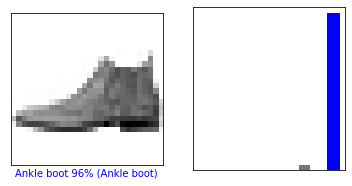

In [ ]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

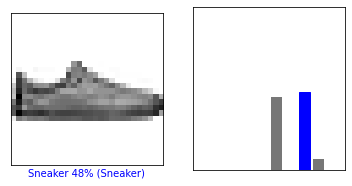

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

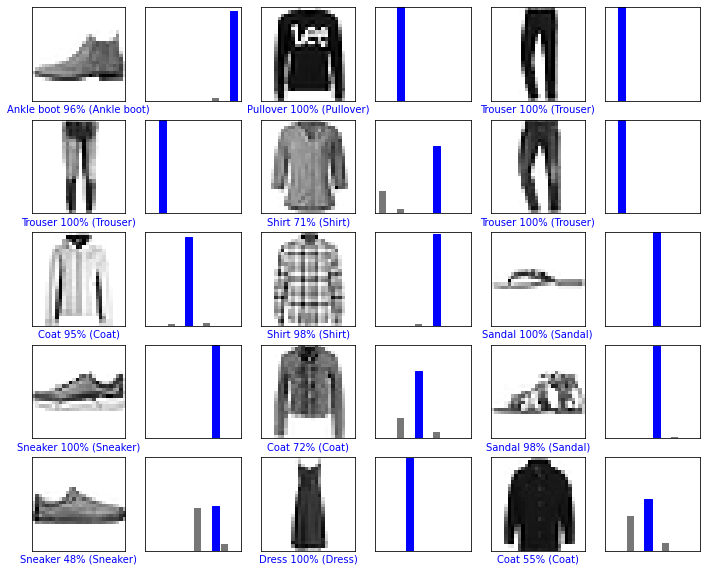

In [ ]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [ ]:
img = test_images[0]

print(img.shape)

(28, 28)


In [ ]:
# 이미지 하나만 사용할 때도 배치에 추가합니다
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.6709494e-04 4.9024983e-08 1.5089998e-06 5.7877713e-08 1.1184435e-06
  1.3321692e-03 1.6494597e-04 3.4419823e-02 1.0297976e-04 9.6381032e-01]]


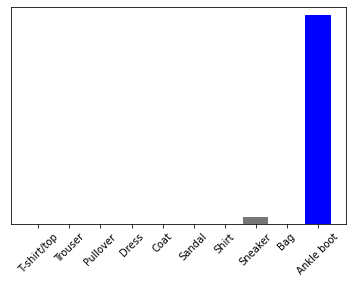

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

9

# Auto Encoder

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [3]:
latent_dim = 64 

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded
  
autoencoder = Autoencoder(latent_dim) 

In [4]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [5]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0238 - val_loss: 0.0133
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0117 - val_loss: 0.0106
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0101 - val_loss: 0.0098
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0096 - val_loss: 0.0095
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0093 - val_loss: 0.0094
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0091 - val_loss: 0.0091
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0088 - val_loss: 0.0091
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0088 - val_loss: 0.0088
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.008

In [7]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

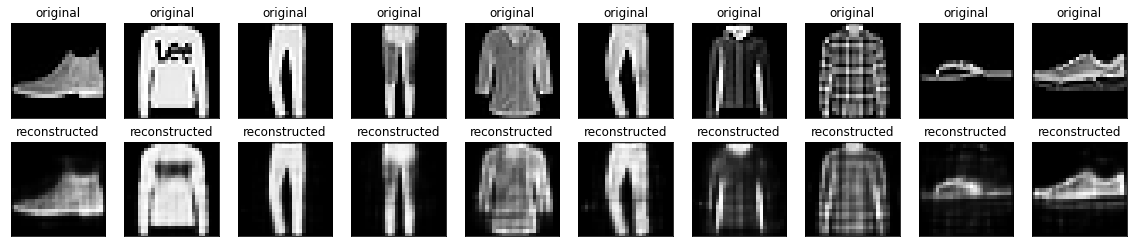

In [8]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# 두번째 예시: 이미지 노이즈 제거

In [9]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

In [10]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape)

(60000, 28, 28, 1)


In [11]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

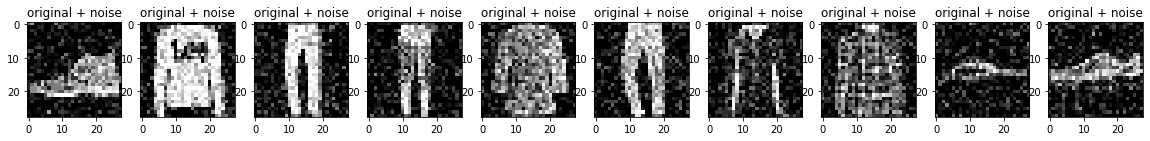

In [12]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

In [13]:
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)), 
      layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2)])
    
    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()

In [14]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [15]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0169 - val_loss: 0.0096
Epoch 2/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0088 - val_loss: 0.0084
Epoch 3/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0081 - val_loss: 0.0080
Epoch 4/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0077 - val_loss: 0.0076
Epoch 5/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0075 - val_loss: 0.0074
Epoch 6/10
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0073 - val_loss: 0.0073
Epoch 7/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0072 - val_loss: 0.0071
Epoch 8/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0071 - val_loss: 0.0070
Epoch 9/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0070 - val_loss: 0.0070
Epoch 10/10
1875/1875 [==============================] - 79s 42m